## Detecting FAKE news 

Deecting a so-called fake news is not a easy task. Thanks to Machine Learning (ML), natural language processing (NLP) and artificial intelligence (AI) that could help us to detect a fake news detector. 

In this exercise we are using simple Naive Bayes to detect a news is fake or real. 

[Dataset](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv)

### import libraries

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#CountVectorizer creates a bow
from sklearn.feature_extraction.text import CountVectorizer
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv('fake_or_real_news.csv') # Load data into DataFrame

In [41]:
df.head(1)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE


In [42]:
# Set index
df = df.set_index("Unnamed: 0") 

# Print first lines of `df` 
df.head(1)

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 8476 to 4330
Data columns (total 3 columns):
title    6335 non-null object
text     6335 non-null object
label    6335 non-null object
dtypes: object(3)
memory usage: 198.0+ KB


In [46]:
# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test =\
train_test_split(df['text'],y,test_size=0.33,random_state=53)

#### Building Vectorizer Classifiers

Now that we have our train and test datasets, we can build our classifiers. To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real, we begin by using ``CountVectorizer`` and `TfidfVectorizer`.

We use a max threshhold set at .7 for the TF-IDF vectorizer tfidf_vectorizer using the `max_df` argument. This removes words which appear in more than 70% of the articles. Also, the built-in `stop_words` parameter will remove English stop words from the data before making vectors.

In [54]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train) #(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test) #(X_test.values)

# Print the first 10 features of the count_vectorizer
print(X_train[:10])

Unnamed: 0
8055                                                     
5656    Report Copyright Violation Do you think there ...
669     The election in 232 photos, 43 numbers and 131...
5630    Email Ever wonder what’s on the mind of today’...
9797    Wells Fargo is Rotting from the Top Down Wells...
3190    Donald Trump may have eased some Republican fe...
9211    Trump rape accuser skips press conference, cit...
132     As Harris lay struggling and dying, he told th...
3626    (CNN) A pair of dramatic raids Friday in Franc...
6561    Food mixology: When eaten together, these food...
Name: text, dtype: object


In [51]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)

In [53]:
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)#(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)#(X_test.values)

Now that you have vectors, you can then take a look at the vector features, stored in `count_vectorizer` and `tfidf_vectorizer`.

In [56]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


There are clearly comments, measurements or other nonsensical words as well as multilingual articles in the dataset that we are using. Normally, it is better to spend more time preprocessing this and removing noise, but as this an introductory exercise, let's see whether the model can overcome the noise and properly classify despite these issues.

In [58]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [60]:
# Print the head of count_df
print(count_df.head())

   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0   0    0     0         0       0      0     0       0      0      0  ...     
1   0    0     0         0       0      0     0       0      0      0  ...     
2   0    0     0         0       0      0     0       0      0      0  ...     
3   0    0     0         0       0      0     0       0      0      0  ...     
4   0    0     0         0       0      0     0       0      0      0  ...     

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]


In [61]:
# Print the head of tfidf_df
print(tfidf_df.head())

    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
1  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
2  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
3  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
4  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     

   حلب  عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 56922 columns]


In [62]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [64]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


As we see, both vectorizers extracted the same tokens, but obviously have different weights. Likely, changing the `max_df` and `min_df` of the TF-IDF vectorizer could alter the result and lead to different features in each.

Now it's time to train and test our model. Here, we'll begin with an NLP favorite, `MultinomialNB` and compare TF-IDF versus bag-of-words.

In [92]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("accuracy:   %0.3f" % score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE','REAL'])
print(cm)

accuracy:   0.893
[[ 865  143]
 [  80 1003]]


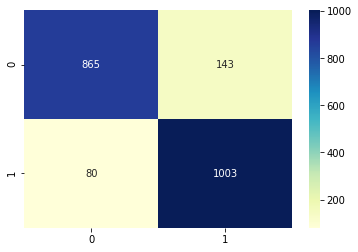

In [93]:
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu" ) #0:FAKE, 1:REAL

In [94]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("accuracy:   %0.3f" % score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
print(cm)

accuracy:   0.857
[[ 739  269]
 [  31 1052]]


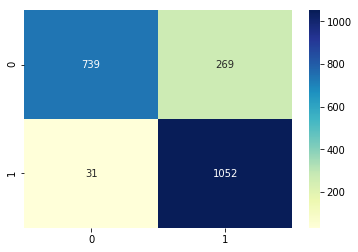

In [95]:
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu" )

With absolutely no parameter tuning, our count vectorized training set count_train is visibly outperforming our TF-IDF vectors in detecting the fake news!

Let's now test a linear model. 

In [96]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [97]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])

accuracy:   0.937


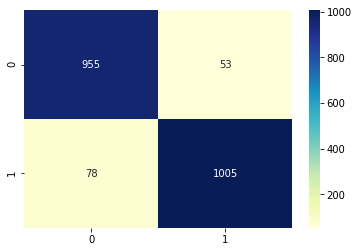

In [99]:
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu" )

The confusion matrix looks a bit better. We can test if tuning the `alpha` value for a `MultinomialNB` creates comparable results. We can also use parameter tuning with `grid search` for a more exhaustive search. Or we can try other model, such as, `SVM`.

In [102]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    #print('Score: ', train_and_predict(alpha))
    print("accuracy:   %0.3f" % train_and_predict(alpha))
    print()

Alpha:  0.0
accuracy:   0.881

Alpha:  0.1
accuracy:   0.898

Alpha:  0.2
accuracy:   0.894

Alpha:  0.30000000000000004
accuracy:   0.890

Alpha:  0.4
accuracy:   0.886

Alpha:  0.5


/Users/bilaspal/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


accuracy:   0.884

Alpha:  0.6000000000000001
accuracy:   0.875

Alpha:  0.7000000000000001
accuracy:   0.870

Alpha:  0.8
accuracy:   0.866

Alpha:  0.9
accuracy:   0.859



Linear model is still the best one!


### Introspecting models
Inspecting the top 30 vectors for fake and real news:

In [121]:
# Get the class labels: class_labels
class_labels = linear_clf.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
#feat_with_weights = sorted(zip(linear_clf.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
#class_labels[0], feat_with_weights[:30]
### Most fake
sorted(zip(linear_clf.coef_[0], feature_names))[:50]

[(-4.892404149001257, '2016'),
 (-4.283699532908533, 'october'),
 (-4.1345622045447294, 'hillary'),
 (-3.2615628192129256, 'share'),
 (-2.9728886816923485, 'article'),
 (-2.9294660801757173, 'november'),
 (-2.559941043577265, 'source'),
 (-2.467829390749052, 'print'),
 (-2.40273766161098, 'war'),
 (-2.363547309954408, 'email'),
 (-2.273683032914433, 'advertisement'),
 (-2.2005730325417003, 'oct'),
 (-2.152886250721954, 'mosul'),
 (-2.137432368160176, 'election'),
 (-2.088883877069037, 'podesta'),
 (-1.9623450443492534, 'establishment'),
 (-1.9370944486940673, 'nov'),
 (-1.8638942201131643, 'com'),
 (-1.7554631034738504, '26'),
 (-1.7332712718017758, 'corporate'),
 (-1.7170573289997164, 'brexit'),
 (-1.7048982479604964, 'pipeline'),
 (-1.7039373327121377, 'jewish'),
 (-1.68532787155601, 'donald'),
 (-1.6640649498172997, 'snip'),
 (-1.6617032647050316, 'dr'),
 (-1.6083730358073027, 'wikileaks'),
 (-1.6026105745298829, 'ayotte'),
 (-1.5714883989740789, 'photo'),
 (-1.5663313301942343, 'en

In [120]:
# Print the second class label and the bottom 20 feat_with_weights entries
#class_labels[1], feat_with_weights[-20:]
### Most real
sorted(zip(linear_clf.coef_[0], feature_names), reverse=True)[:50]

[(4.853370999503424, 'said'),
 (2.6507512652266505, 'says'),
 (2.573297954672576, 'tuesday'),
 (2.4142130656544833, 'gop'),
 (2.4000409141974504, 'islamic'),
 (2.3094072400517485, 'friday'),
 (2.230562968318458, 'cruz'),
 (2.206656898080858, 'conservative'),
 (2.148834204564349, 'monday'),
 (2.1142479697803394, 'marriage'),
 (2.0920397547231486, 'attacks'),
 (2.074904698233787, 'jobs'),
 (2.028462584093119, 'conservatives'),
 (1.978287894046736, 'march'),
 (1.9731370479191748, 'continue'),
 (1.9567596505932712, 'sunday'),
 (1.9115175424791506, 'presumptive'),
 (1.9057418068937901, 'rush'),
 (1.8955560294958564, 'candidates'),
 (1.8721137399916936, 'debate'),
 (1.8164044563771033, 'convention'),
 (1.807620750722371, 'sen'),
 (1.7742833842884322, 'deal'),
 (1.7394626737370047, 'week'),
 (1.7289975372712945, 'paris'),
 (1.7051483674234174, 'church'),
 (1.7007609707199327, 'group'),
 (1.6673848713071295, 'say'),
 (1.6628231401290956, 'recounts'),
 (1.6088910488963086, 'campaign'),
 (1.5735

Clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

Also, the real news data uses forms of the verb "to say" more often, likely because in newspapers and most journalistic publications sources are quoted directly ("German Chancellor Angela Merkel said...").

There are lot we can do ....